In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Limitations of Fixed Basis Functions
Or: *Why single-layer linear models like regression aren't enough*

Linear models for classification (like logistic regression) are based on linear combinations of basis functions $\phi_j(\mathbf{x})$ and take the form:
$$y(\mathbf{x}, \mathbf{w}) = f \bigg(\sum_{j=1}^M w_j\phi_j(\mathbf{x}) + w_0\bigg)$$
Where $f(\cdot)$ is a nonlinear output activation function (like softmax or sigmoid). OLS takes the same form but replaces $f(\cdot)$ with the identity activation function (aka. link function).

Because general linear models allow for an arbitrary set of nonlinear basis functions $\{\phi_i(\mathbf{x})\}$, the can in principal provide a solution to *any* regression or classification problem.

### The Curse of Dimensionality

Let's examine some characteristics of high-dimensional spaces. Consider a hypersphere in $D$-dimensional space with radius $r=1$. What fraction of the hypersphere's volumne lies between radius $r=1-\epsilon$ and $r=1$?\
Let volume be: $$V_D(r) = K_Dr^D$$ Where $K_D$ is a constant that depends only on the dimensions $D$.\
The fraction of total volume is given by: $$\frac{V_D(1) - V_D(1-\epsilon)}{V_D(1)} = 1 - (1-\epsilon)^D$$

As $D$ increases, this fraction increases towards $1$, even for very small $\epsilon$. Ex:

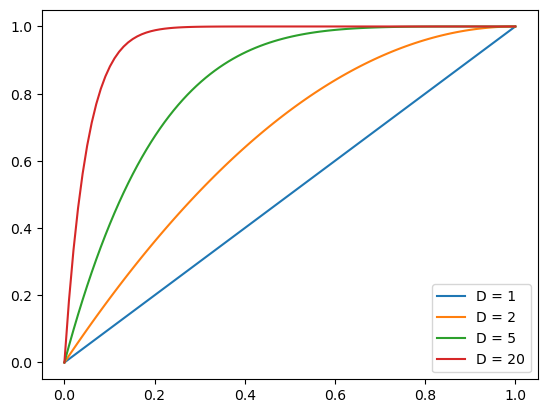

In [16]:
def volume(D, eps): return 1 - (1 - eps)**D

eps = np.linspace(0, 1, 100)
for D in [1, 2, 5, 20]:
    plt.plot(eps, [volume(D=D, eps=eps) for eps in eps], label=f"D = {D}");
plt.legend();

So, we see a remarkable result that in spaces of high dimensionality, most of the volume of the hypersphere becomes concentrated in a thin shell near its surface...\
As dimensions increase, the distance between points increases exponentially, causing effictive sparsity in datasets to increase exponentially.

## Data Manifolds

One reason that ML techniques can be effective despite the curse of dimensionality is that real data are generally confined to regions of space that have lower effective dimensionality.

See `data_manifolds` notebook.

## Multilayer Networks

In general, we want to choose basis functions $\phi_j(\mathbf{x})$ that have *learnable* parameters and that are *differentiable* (so that we may optimize them via gradient descent). The most successful choice of basis functions has been a nonlinear basis function of the form:
$$y(\mathbf{x}, \mathbf{w}) = f \bigg(\sum_{j=1}^M w_j\phi_j(\mathbf{x}) + w_0\bigg)$$

This is a nonlinear function of a *linear combination* of the input variables, where the coefficients in the linear combination are learnable parameters.


Consider a model with two layers. We will use the superscript $(i)$ to indicate layer $i$. The *pre-activation* for the first layer is a set of $M$ linear combinations of $D$ input variables:
$$a_j^{(1)} = \sum_{i=1}^D w_{ji}^{(1)} x_i + w_{j0}^{(1)}, \  \ j=1, ..., M$$
Here, $w_{ji}^{(1)}$ are the *weights* of combination $j$ and $w_{j0}^{(1)}$ is the *bias* of combination $j$. The quantity $a_j^{(1)}$ is the *pre-activation*, which is transformed into an *activation* using a differentiable, nonlinear activation function:
$$z_j{(1)} = h(a_j^{(1)})$$
This activation is analagous to a basis function. Because this is not the final layer of the network, this layer's basis functions are called *hidden units*

The second layer has preactivations specified as:
$$a_k^{(2)} = \sum_{j=1}^M w_{kj}^{(2)}z_j^{(1)} + w_{k0}^{(2)}, \ \ k=1, ..., K$$
Where $K$ is the total number of outputs. Note that this is again a simple set of linear combinations, only the input variables are now the activations $z_j^{(1)}$ rather than the input variables. Finally, this preactivation is transformed by a function $f(\cdot)$ to a set of network outputs $y_k$.

The nomenclature for each $j$ of the $M$ linear combinations is to call them *neurons*.

We may consolidate the notation by defining an additional input variable $x_0 = 1$, so the first preactivation may be expressed as:
$$a_j = \sum_{i=0}^D w_{ji}^{(1)}x_i$$
Then, the function for $y_k$ may be expressed as:
$$y_k(\mathbf{x}, \mathbf{w}) = f \Bigg(\sum_{j=0}^M w_{kj}^{(2)} h \bigg(\sum_{i=0}^D w_{ji}^{(1)} x_i \bigg) \Bigg)$$
Note that this complete expression may be viewed as a set of $M$ basis functions.

If we express the input variables as a column vector $\mathbf{x} = (x_i, ..., x_N)^\intercal$, then these linear combinations may be expressed with matrix multiplication:
$$\mathbf{y}(\mathbf{x}, \mathbf{w}) = f\bigg(\mathbf{W}^{(2)} h\big(\mathbf{W}^{(1)}\mathbf{x}\big)\bigg)$$

## Activation Functions

There is a lot of nuance in the choice of activation functions, but the treatment here is fairly high-level. 

The most basic activation function is simply the identity:
$$h(a) = a$$
In this case, the hidden layer activations are simply a linear combination of the inputs. If the network only has identity activations, then it is a linear function of the inputs. It corresponds to a linear model.

In general, we want differentiable activation functions (with some exception) so that we may learn parameters of hidden layers via gradient descent. 

**Sigmoid Activation Function**
$$\sigma(a) = \frac{1}{1 + \exp(-a)}$$
The 'ole reliable. This is a simple, nonlinear, continuously differentiable activation function.

**tanh Activation Function**
$$\text{tanh}(a) = \frac{e^a - e^{-a}}{e^a + e^{-a}} = 2\sigma(2a) - 1$$
A close relative of the sigmoid activation function is the hyperbolic-tangent activation function, or simply *tanh*.

**Hard tanh Activation Function**
$$h(a) = \text{max}(-1, \text{min}(1, a))$$
This mimics the tanh activation but fixes its limits to $-1$ or $1$. Note that the tanh function asymptotically approaches $-1$ as $x\rightarrow - \infty$ and $1$ as $x \rightarrow \infty$.

*See `log_reg_basis_functions` for investigation of these activation functions*

A significant issue with these activation functions is that their gradients exponentially decay towards zero when the inputs to their layers have large values. This leads to the issue of ***vanishing gradients*** discussed later. Some of the following activation functions ameliorate this:

**Softplus Activation Function**
$$h(a) = \ln(1 + \exp(a))$$
$h(a)$ approximates $a$ for very large values of $a$, ensuring that gradients will remain non-zero.

**ReLU Activation Function**
$$h(a) = \text{max}(0, a)$$
The "rectified linear unit" activation function simply zeros-out negative preactivations. This activation function is widely used because it is very efficient and computationaly inexpensive. Note that it is *not continuously differentiable* because the derivative of the ReLU function is not defined at $a=0$. However, this doesn't prevent training by gradient descent because we simply zero-out gradients for negative $a$ and chain gradients through linearly (i.e. as identity) for posistive $a$. Because ReLU is intentionally zero-ing out gradients there are some precautions that must be observed when training with ReLU. Some of these I explored in the notebook `sinenet`. Notably, we must be careful not to train too quickly (we don't want to kill neurons early in the training process), we want generally larger networks (more neurons) so that there are fewer possibilities for neurons to be killed prematurely, and we want to use effective training batch sizes so that the information used to update each neuron's parameters at each step of training is sufficiently *stochastic* and not washed out by using aggregate information over the entire training set. Also, ReLU may be more sensitive to parameter initializations (in some ways) because negative activations in an initial training step may prevent some neurons from *ever* learning.

**Leaky ReLU**
$$h(a) = \max(0,a) + \alpha \min(0, a), \ \ 0 < \alpha < 1$$
Leaky ReLU relaxes the positive-value bottleneck applied by ReLu by adding a scaled-down value of the negative preactivations to propogate forwards through the network, ensuring that gradients are nonzero for $a<0$. This ensures that we won't prematurely kill neurons. 

Softplus may also be viewed as a somewhat more relaxed, "leaky", ReLU since it converges to $0$ for $a<0$.

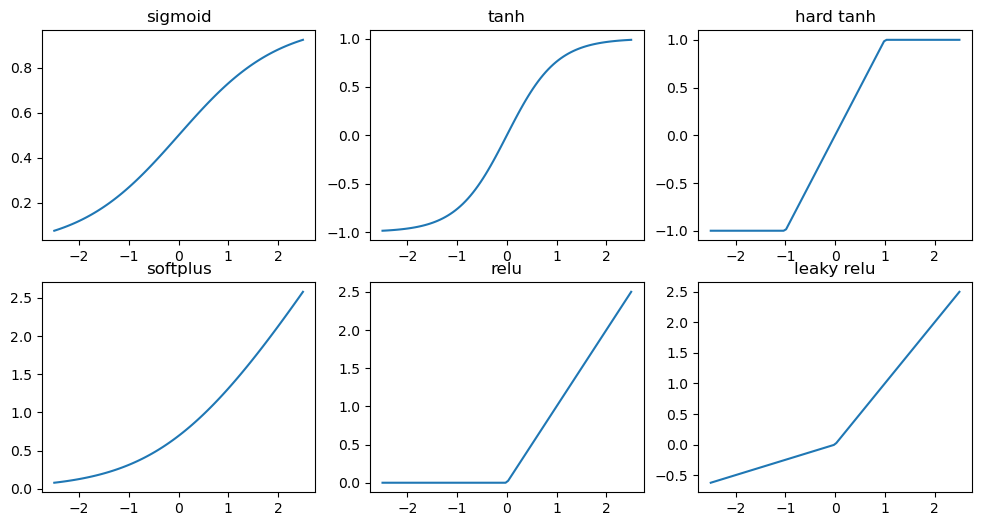

In [19]:
x = np.linspace(-2.5, 2.5, 100)
def sigmoid(x):             return 1 / (1 + np.exp(-x))
def tanh(x):                return 2*sigmoid(2*x) - 1
def hard_tanh(x):           return np.clip(x, -1, 1)
def softplus(x):            return np.log(1 + np.exp(x))
def relu(x):                return np.maximum(0, x)
def leaky_relu(x, alpha):   return relu(x) + alpha * np.minimum(0, x)

fig, ax = plt.subplots(2, 3, figsize=(12, 6))
ax[0, 0].plot(x, sigmoid(x))
ax[0, 0].set_title('sigmoid')
ax[0, 1].plot(x, tanh(x))
ax[0, 1].set_title('tanh')
ax[0, 2].plot(x, hard_tanh(x))
ax[0, 2].set_title('hard tanh')
ax[1, 0].plot(x, softplus(x))
ax[1, 0].set_title('softplus')
ax[1, 1].plot(x, relu(x))
ax[1, 1].set_title('relu')
ax[1, 2].plot(x, leaky_relu(x, 0.25))
ax[1, 2].set_title('leaky relu')


plt.show();